In [1]:
import pandas as pd 
import numpy as np 
from pandas_datareader import data as web

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm

# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [3]:
btc = web.DataReader('BTC-USD', data_source='yahoo', start='01-01-2014')

btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [4]:
eth = web.DataReader('ETH-USD', data_source='yahoo', start='01-01-2014')

eth.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-06,3.536610,2.521120,2.831620,2.772120,164329.0,2.772120
2015-08-07,2.798810,0.714725,2.793760,0.753325,674188.0,0.753325
2015-08-08,0.879810,0.629191,0.706136,0.701897,532170.0,0.701897
2015-08-09,0.729854,0.636546,0.713989,0.708448,405283.0,0.708448
2015-08-10,1.131410,0.663235,0.708087,1.067860,1463100.0,1.067860


In [5]:
btc = btc.loc['2015-08-06':]

In [6]:
combined_df = pd.merge(eth['Close'], btc['Close'], right_index = True, left_index= True)

In [7]:
combined_df = combined_df.rename(columns={'Close_x':'ETH', 'Close_y':'BTC'})

In [8]:
# Histogram comparing Daily Returns since.... 
combined_df['ETH_returns'] = combined_df['ETH'].pct_change() * 100 
combined_df['BTC_returns'] = combined_df['BTC'].pct_change() * 100

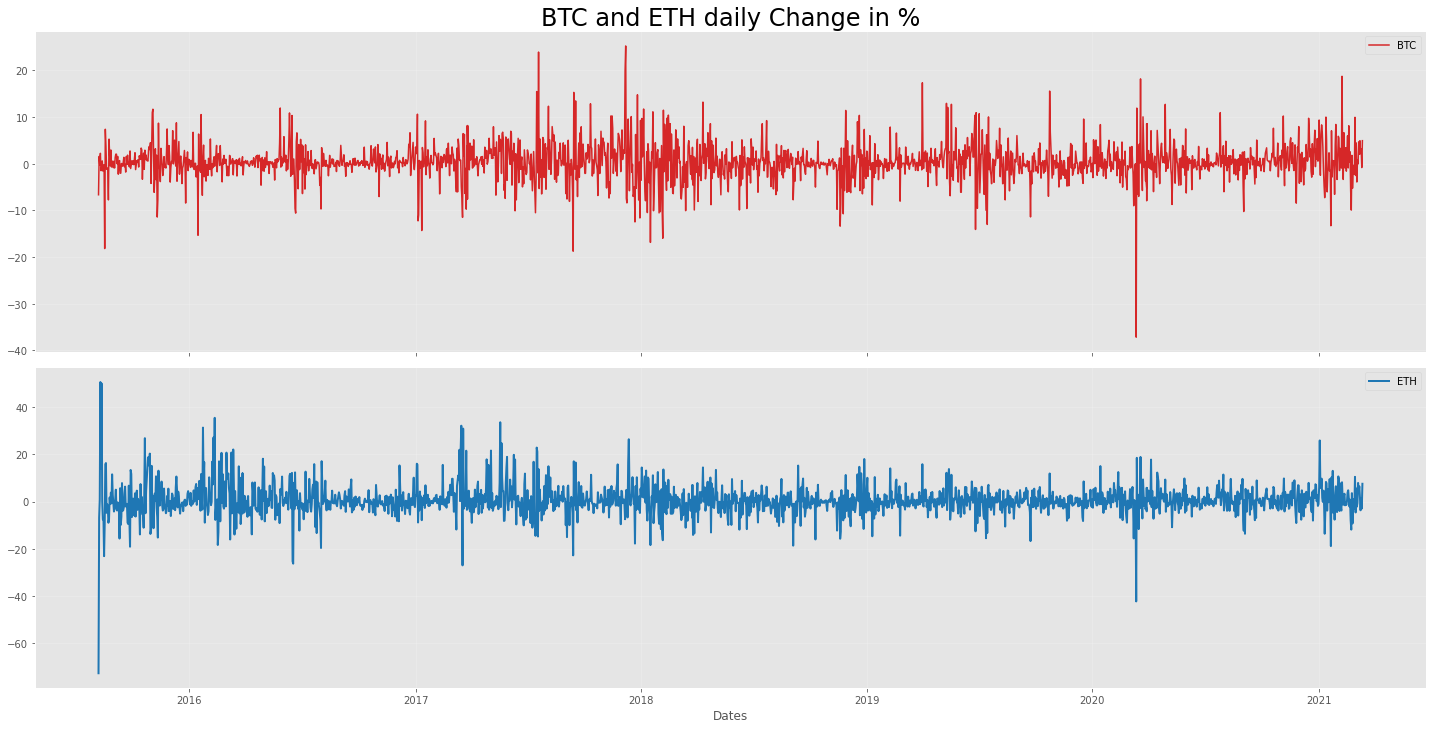

In [11]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 10))

ax1.plot(combined_df['BTC_returns'], color='tab:red', label = 'BTC')
ax1.grid(True, alpha=.2)
ax1.set_title('BTC and ETH daily Change in %', fontsize=24)
ax1.legend()

ax2.plot(combined_df.index, combined_df['ETH_returns'], label='ETH', color = 'tab:blue', lw = 2)


ax2.grid(True, alpha=.2)
ax2.legend()

plt.tight_layout()

plt.xlabel('Dates')
plt.show()

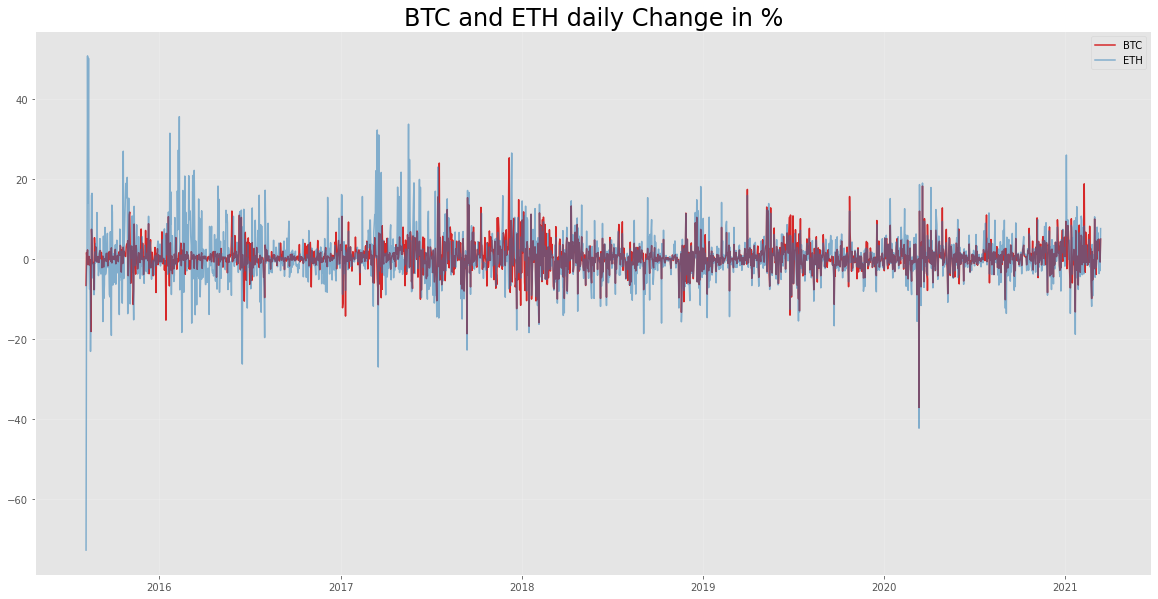

In [13]:
f, ax= plt.subplots(figsize=(20, 10))

ax.plot(combined_df['BTC_returns'], color='tab:red', label = 'BTC')
ax.plot(combined_df['ETH_returns'], color='tab:blue', label = 'ETH', alpha=.5)
ax.grid(True, alpha=.2)
ax.set_title('BTC and ETH daily Change in %', fontsize=24)
ax.legend()

[Text(0, 0, '-4 Sigma'),
 Text(0, 0, '-3 Sigma'),
 Text(0, 0, '-2 Sigma'),
 Text(0, 0, '-1 Sigma'),
 Text(0, 0, '0'),
 Text(0, 0, '1 Sigma'),
 Text(0, 0, '2 Sigma'),
 Text(0, 0, '3 Sigma'),
 Text(0, 0, '4 Sigma')]

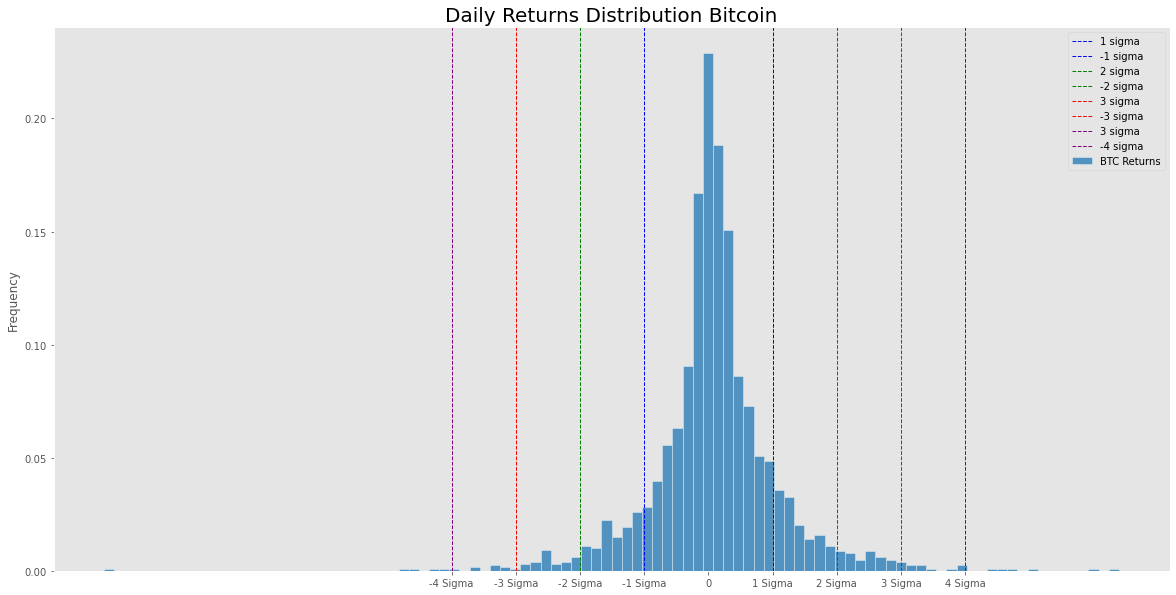

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

ax.hist(
    combined_df['BTC_returns'], 
    bins=100, 
    label='BTC Returns', # Use label to specify legend name
    color='tab:blue', # Override the default color
    alpha=.75, # Adjust alpha to allow both datasets to appear
    density=True, # Set y-axis as probability. 
    ec = 'white'
)

# Enable the legend
ax.legend()
ax.set_title("Daily Returns Distribution Bitcoin", fontsize=20)
ax.set_xlabel("")
ax.set_ylabel("Frequency")
ax.set_xticks([])
ax.grid(False)
plt.axvline(x= combined_df['BTC_returns'].std(), label = '1 sigma', linestyle='dashed', linewidth = 1, color = 'blue')
plt.axvline(x= - combined_df['BTC_returns'].std(), label = '-1 sigma', linestyle='dashed', linewidth = 1, color = 'blue')
plt.axvline(x= 2 * combined_df['BTC_returns'].std(), label = '2 sigma', linestyle='dashed', linewidth = 1, color = 'green')
plt.axvline(x= - 2 *combined_df['BTC_returns'].std(), label = '-2 sigma', linestyle='dashed', linewidth = 1, color = 'green')
plt.axvline(x= 3 * combined_df['BTC_returns'].std(), label = '3 sigma', linestyle='dashed', linewidth = 1, color = 'red')
plt.axvline(x= - 3 * combined_df['BTC_returns'].std(), label = '-3 sigma', linestyle='dashed', linewidth = 1, color = 'red')
plt.axvline(x= 4 * combined_df['BTC_returns'].std(), label = '3 sigma', linestyle='dashed', linewidth = 1, color = 'purple')
plt.axvline(x= - 4 *combined_df['BTC_returns'].std(), label = '-4 sigma', linestyle='dashed', linewidth = 1, color = 'purple')
plt.legend()

x = ['-4 Sigma', '-3 Sigma', '-2 Sigma', '-1 Sigma', '0', '1 Sigma', '2 Sigma', '3 Sigma', '4 Sigma']
l = [- 4 *combined_df['BTC_returns'].std(), - 3 *combined_df['BTC_returns'].std(), - 2 *combined_df['BTC_returns'].std(), -1 *combined_df['BTC_returns'].std(),
     0,  1 * combined_df['BTC_returns'].std(), 2 * combined_df['BTC_returns'].std(), 3 * combined_df['BTC_returns'].std(), 4 *combined_df['BTC_returns'].std()]

ax.set_xticks(l)
ax.set_xticklabels(x)

[Text(0, 0, '-4 Sigma'),
 Text(0, 0, '-3 Sigma'),
 Text(0, 0, '-2 Sigma'),
 Text(0, 0, '-1 Sigma'),
 Text(0, 0, '0'),
 Text(0, 0, '1 Sigma'),
 Text(0, 0, '2 Sigma'),
 Text(0, 0, '3 Sigma'),
 Text(0, 0, '4 Sigma')]

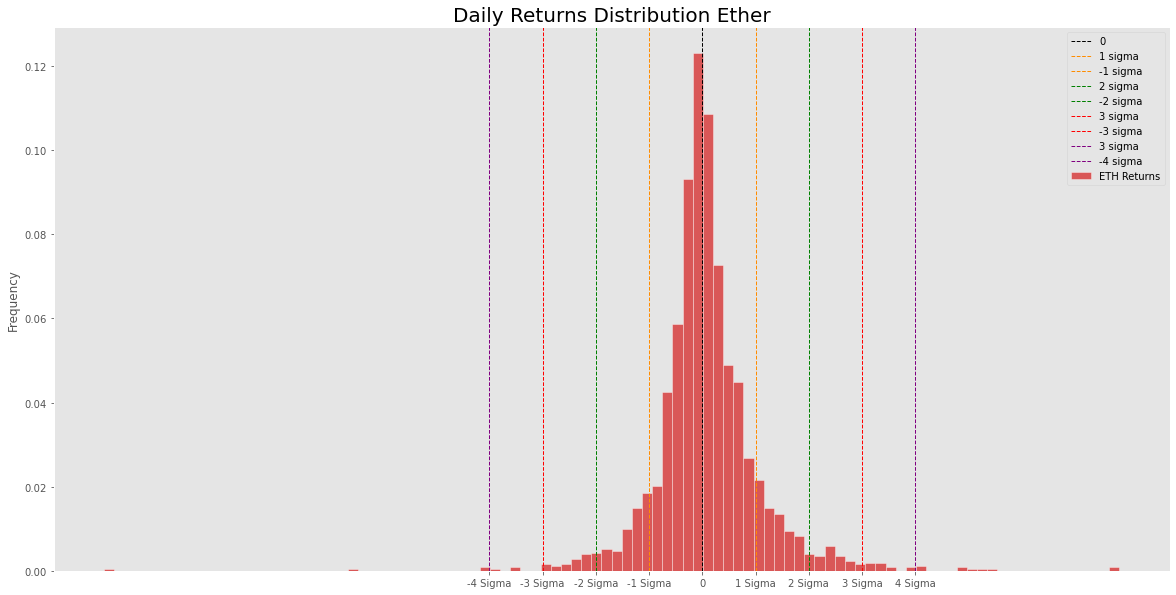

In [16]:
fig, ax = plt.subplots(figsize=(20,10))

ax.hist(
    combined_df['ETH_returns'], 
    bins=100, 
    label='ETH Returns', # Use label to specify legend name
    color='tab:red', # Override the default color
    alpha=.75, # Adjust alpha to allow both datasets to appear
    density=True, # Set y-axis as probability. 
    ec = 'white'
)

# Enable the legend
ax.legend()
ax.set_title("Daily Returns Distribution Ether", fontsize=20)
ax.set_xlabel("")
ax.set_ylabel("Frequency")
ax.set_xticks([])
ax.grid(False)
plt.axvline(x= 0, label = '0', linestyle='dashed', linewidth = 1, color = 'black')
plt.axvline(x= combined_df['ETH_returns'].std(), label = '1 sigma', linestyle='dashed', linewidth = 1, color = 'darkorange')
plt.axvline(x= - combined_df['ETH_returns'].std(), label = '-1 sigma', linestyle='dashed', linewidth = 1, color = 'darkorange')
plt.axvline(x= 2 * combined_df['ETH_returns'].std(), label = '2 sigma', linestyle='dashed', linewidth = 1, color = 'green')
plt.axvline(x= - 2 *combined_df['ETH_returns'].std(), label = '-2 sigma', linestyle='dashed', linewidth = 1, color = 'green')
plt.axvline(x= 3 * combined_df['ETH_returns'].std(), label = '3 sigma', linestyle='dashed', linewidth = 1, color = 'red')
plt.axvline(x= - 3 * combined_df['ETH_returns'].std(), label = '-3 sigma', linestyle='dashed', linewidth = 1, color = 'red')
plt.axvline(x= 4 * combined_df['ETH_returns'].std(), label = '3 sigma', linestyle='dashed', linewidth = 1, color = 'purple')
plt.axvline(x= - 4 *combined_df['ETH_returns'].std(), label = '-4 sigma', linestyle='dashed', linewidth = 1, color = 'purple')
plt.legend()

x = ['-4 Sigma', '-3 Sigma', '-2 Sigma', '-1 Sigma', '0', '1 Sigma', '2 Sigma', '3 Sigma', '4 Sigma']
l = [- 4 *combined_df['ETH_returns'].std(), - 3 *combined_df['ETH_returns'].std(), - 2 *combined_df['ETH_returns'].std(), -1 *combined_df['ETH_returns'].std(),
     0,  1 * combined_df['ETH_returns'].std(), 2 * combined_df['ETH_returns'].std(), 3 * combined_df['ETH_returns'].std(), 4 *combined_df['ETH_returns'].std()]

ax.set_xticks(l)
ax.set_xticklabels(x)

In [17]:
df_rets = combined_df[['BTC_returns', 'ETH_returns']]

In [18]:
df_rets.corr()

,BTC_returns,ETH_returns
BTC_returns,1.000000,0.487185
ETH_returns,0.487185,1.000000


Text(0.5, 1.0, 'BTC vs ETH returns Correlation')

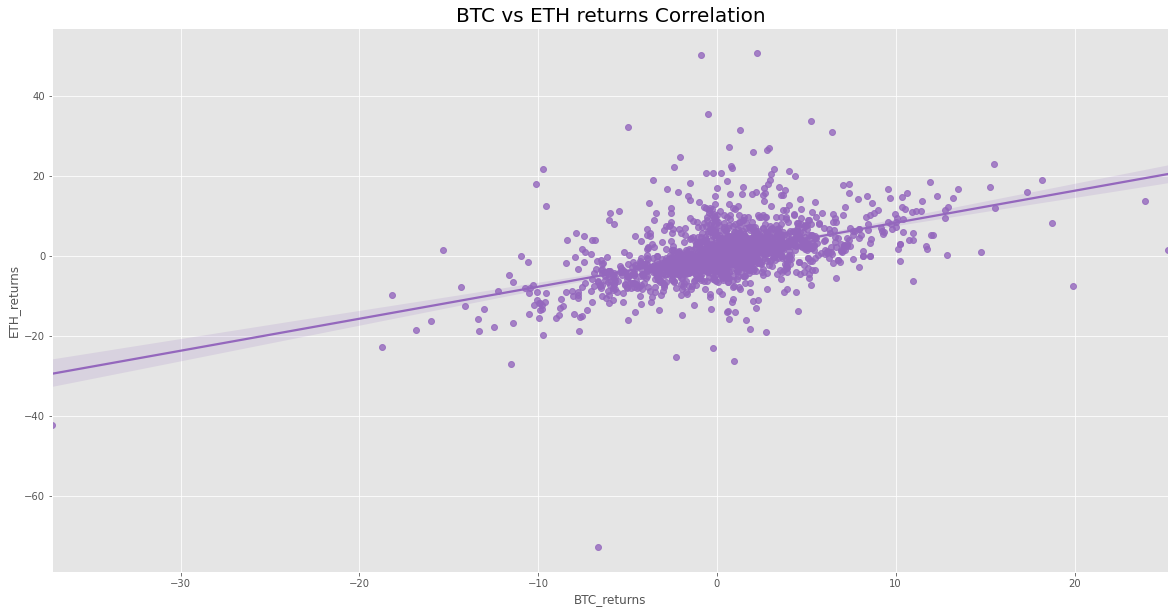

In [24]:
plt.figure(figsize=(20,10))
sns.regplot(x="BTC_returns", y="ETH_returns", color = 'tab:purple',data=df_rets);
plt.title('BTC vs ETH returns Correlation', fontsize=20)

In [20]:
df_rets1 = df_rets.loc['2018-01-01':]

In [21]:
df_rets1.corr()

,BTC_returns,ETH_returns
BTC_returns,1.0000,0.7995
ETH_returns,0.7995,1.0000


Text(0.5, 1.0, 'BTC vs ETH returns Correlation since 2018')

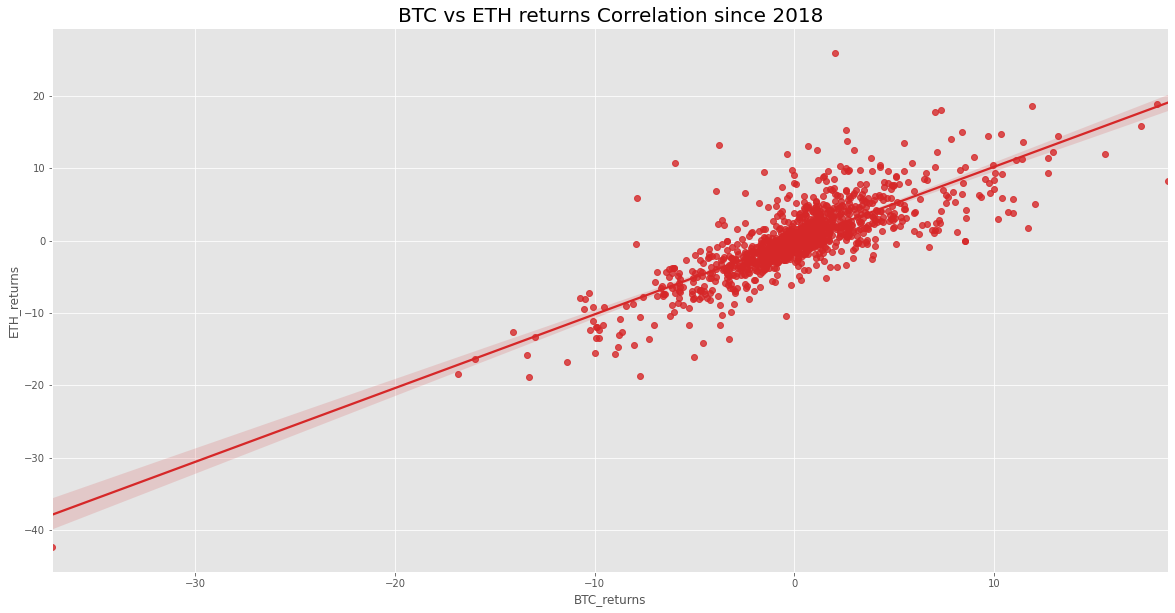

In [26]:
plt.figure(figsize=(20,10))
sns.regplot(x="BTC_returns", y="ETH_returns", color = 'tab:red',data=df_rets1);
plt.title('BTC vs ETH returns Correlation since 2018', fontsize=20)

In [27]:
combined_df['ETHBTC'] = combined_df['ETH']/combined_df['BTC']

In [29]:
combined_df.tail()

,ETH,BTC,ETH_returns,BTC_returns,ETHBTC
Date,,,,,
2021-03-09,1868.048828,54824.117188,1.816123,4.933522,0.034073
2021-03-10,1799.166260,56008.550781,-3.687407,2.160424,0.032123
2021-03-11,1826.194946,57805.121094,1.502290,3.207671,0.031592
2021-03-12,1772.102417,57332.089844,-2.962035,-0.818321,0.030909
2021-03-13,1906.084595,60168.050781,7.560634,4.946551,0.031679


In [30]:
combined_df['ETHBTC_returns'] = combined_df['ETHBTC'].pct_change() * 100

In [31]:
combined_df['ETHBTC_MA200'] = combined_df['ETHBTC'].rolling(window=200).mean()
combined_df['ETHBTC_MA50'] = combined_df['ETHBTC'].rolling(window=50).mean()
combined_df['ETHBTC_MA365'] = combined_df['ETHBTC'].rolling(window=365).mean()

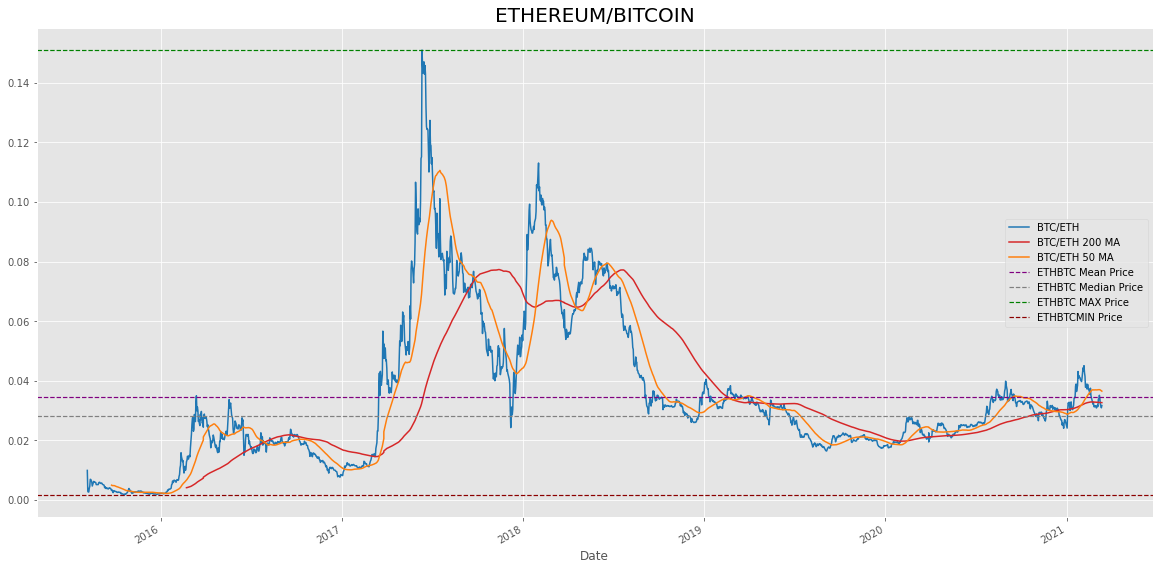

In [36]:
f, ax = plt.subplots(figsize=(20,10))

combined_df['ETHBTC'].plot(label = 'BTC/ETH', color = 'tab:blue')
combined_df['ETHBTC_MA200'].plot(label = 'BTC/ETH 200 MA', color = 'tab:red')
combined_df['ETHBTC_MA50'].plot(label = 'BTC/ETH 50 MA', color = 'tab:orange')
ax.set_title('ETHEREUM/BITCOIN', fontsize=20)
plt.axhline(y=combined_df['ETHBTC'].mean(), color='purple', linestyle='dashed', label = 'ETHBTC Mean Price',linewidth=1.2)
plt.axhline(y=combined_df['ETHBTC'].median(), color='gray', linestyle='dashed', label = 'ETHBTC Median Price',linewidth=1.2)
plt.axhline(y=combined_df['ETHBTC'].max(), color='green', linestyle='dashed', label = 'ETHBTC MAX Price',linewidth=1.2)
plt.axhline(y=combined_df['ETHBTC'].min(), color='darkred', linestyle='dashed', label = 'ETHBTCMIN Price',linewidth=1.2)
plt.legend(loc='best')

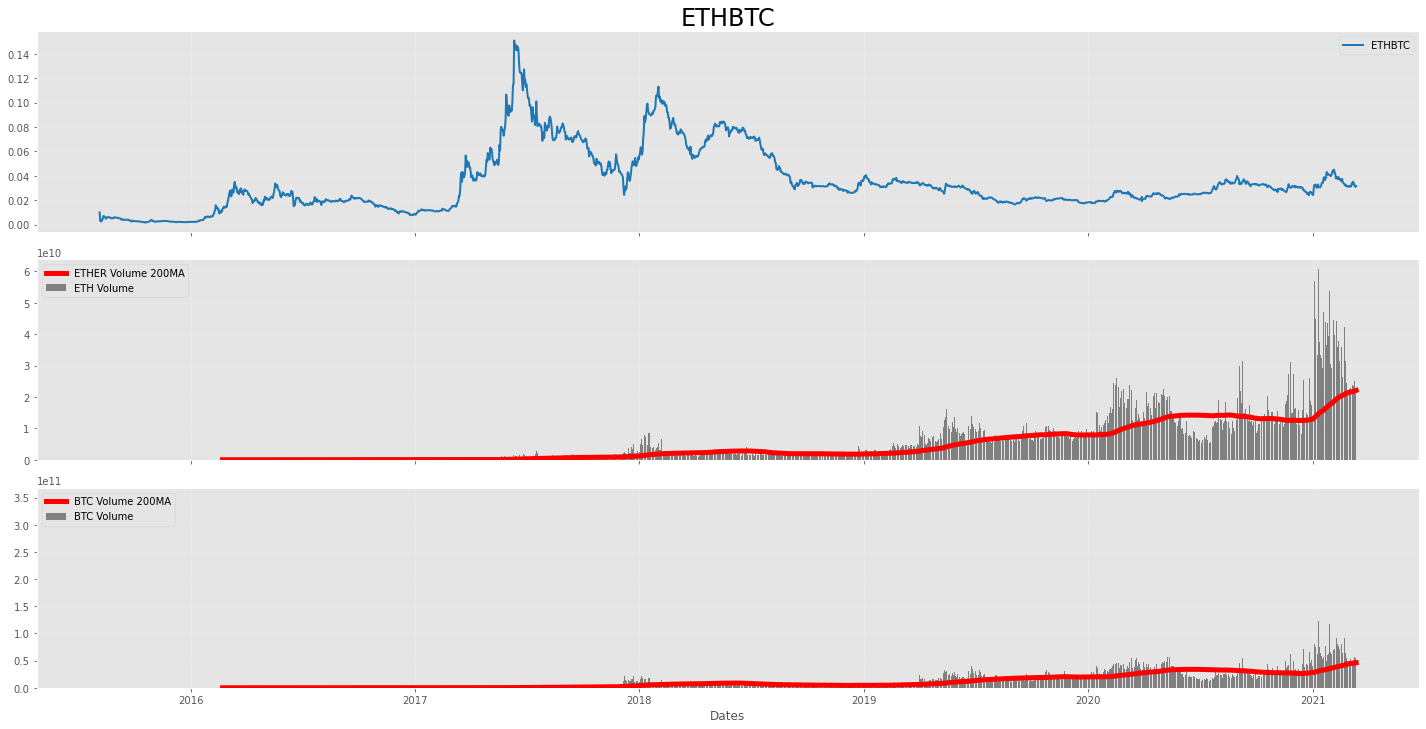

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(20, 10))

ax1.plot(combined_df['ETHBTC'], color='tab:blue', label = 'ETHBTC',lw=2)
ax1.grid(True, alpha=.15)
ax1.set_title('ETHBTC', fontsize=24)
ax1.legend()

ax2.bar(eth.index, eth['Volume'], label='ETH Volume', lw=1, color = 'gray')
ax2.plot(eth.index, eth['Volume'].rolling(window=200).mean(), label='ETHER Volume 200MA', lw=5, color = 'red')
ax2.grid(True, alpha=.15)
ax2.legend()

ax3.bar(btc.index, btc['Volume'], label='BTC Volume', lw=1, color = 'gray')
ax3.plot(btc.index, btc['Volume'].rolling(window=200).mean(), label='BTC Volume 200MA', lw=5, color = 'red')
ax3.grid(True, alpha=.15)
ax3.legend()

plt.tight_layout()
plt.xlabel('Dates')
plt.show()

In [39]:
# calculating RSI

rsi_period = 9 
btc_chg = combined_df['ETHBTC'].diff(1)
combined_df['Gain'] = btc_chg.mask(btc_chg < 0,0)
combined_df['Loss'] = btc_chg.mask(btc_chg > 0,0)

combined_df['Average Gain'] = combined_df['Gain'].ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
combined_df['Average Loss'] = combined_df['Loss'].ewm(com = rsi_period - 1, min_periods = rsi_period).mean()

rs = abs(combined_df['Average Gain']/combined_df['Average Loss'])
rsi = 100-(100/(1+rs))
rsi = pd.DataFrame(rsi)
rsi = rsi.dropna()
rsi = rsi.rename(columns={0: "RSI_9"})
rsi.tail()

,RSI_9
Date,
2021-03-09,54.965176
2021-03-10,43.095179
2021-03-11,40.422559
2021-03-12,37.093311
2021-03-13,43.043667


In [40]:
df_c = combined_df.loc['2015-08-15':]

In [41]:
df_c = pd.merge(df_c, rsi, right_index=True, left_index=True)
df_c

,ETH,BTC,ETH_returns,BTC_returns,ETHBTC,ETHBTC_returns,ETHBTC_MA200,ETHBTC_MA50,ETHBTC_MA365,Gain,Loss,Average Gain,Average Loss,RSI_9
Date,,,,,,,,,,,,,,
2015-08-15,1.566030,258.506989,-7.275148,-1.163829,0.006058,-6.183281,NaN,NaN,NaN,0.000000,-0.000399,0.000469,-0.000621,43.038687
2015-08-16,1.203610,257.976013,-23.142601,-0.205401,0.004666,-22.984410,NaN,NaN,NaN,0.000000,-0.001392,0.000394,-0.000745,34.586868
2015-08-17,1.087050,211.078995,-9.684199,-18.178829,0.005150,10.381946,NaN,NaN,NaN,0.000484,0.000000,0.000408,-0.000631,39.255351
2015-08-18,1.258860,226.684006,15.805164,7.392972,0.005553,7.833094,NaN,NaN,NaN,0.000403,0.000000,0.000407,-0.000538,43.062619
2015-08-19,1.464920,235.350006,16.368782,3.822943,0.006224,12.083879,NaN,NaN,NaN,0.000671,0.000000,0.000444,-0.000462,49.040019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-09,1868.048828,54824.117188,1.816123,4.933522,0.034073,-2.970832,0.032706,0.036994,0.029322,0.000000,-0.001043,0.000487,-0.000399,54.965176
2021-03-10,1799.166260,56008.550781,-3.687407,2.160424,0.032123,-5.724165,0.032694,0.036873,0.029343,0.000000,-0.001950,0.000432,-0.000571,43.095179
2021-03-11,1826.194946,57805.121094,1.502290,3.207671,0.031592,-1.652379,0.032677,0.036727,0.029359,0.000000,-0.000531,0.000384,-0.000567,40.422559


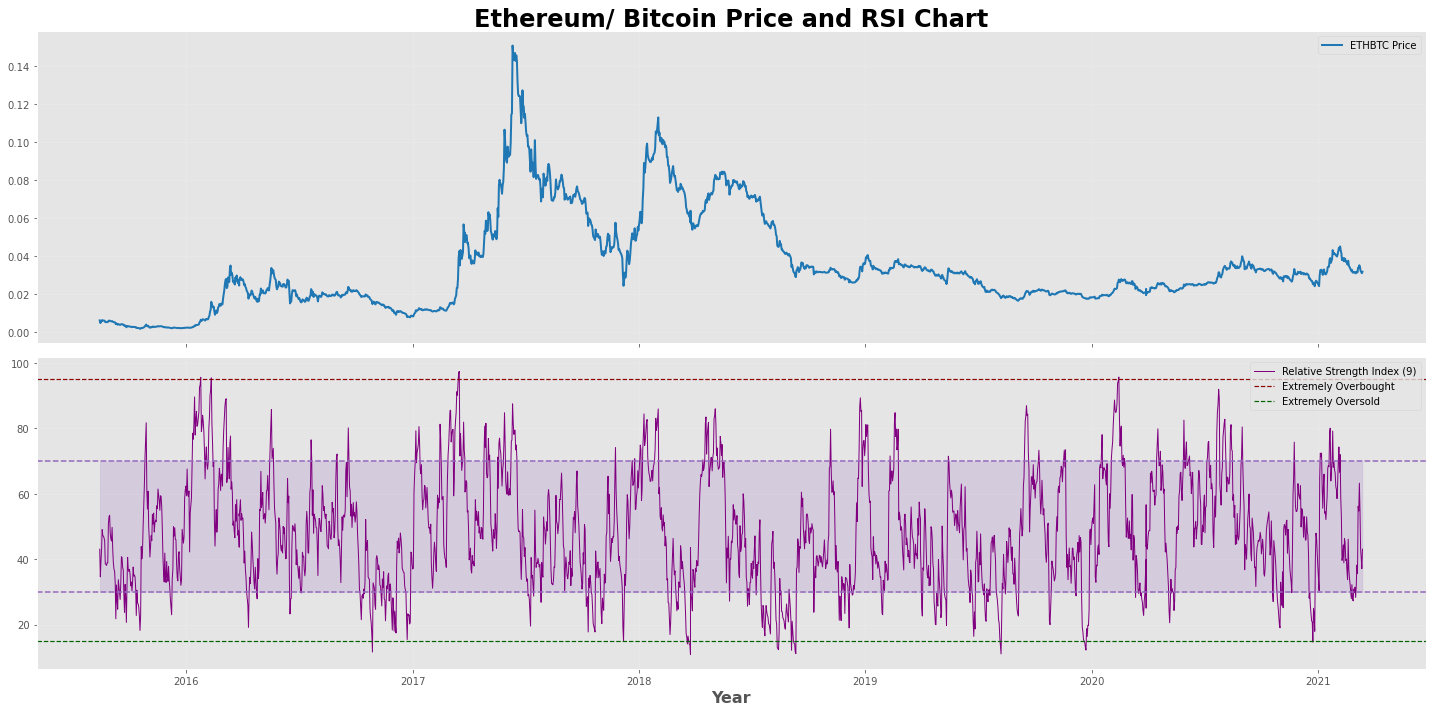

In [42]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 10))

ax1.plot(df_c['ETHBTC'], color='tab:blue', label = 'ETHBTC Price', lw=2)
ax1.grid(True, alpha=.15)
ax1.set_title('Daily Prices')
ax1.legend()

ax2.plot(df_c.index, df_c['RSI_9'], label='Relative Strength Index (9)', color = 'purple', lw=1)
ax2.grid(True, alpha=.15)
ax2.legend()
ax2.set_xlabel('Year', fontsize=16, fontweight = 'bold')
ax1.set_title('Ethereum/ Bitcoin Price and RSI Chart', fontsize=24, fontweight='bold')
plt.axhline(y = 30, color = 'tab:purple', linestyle = 'dashed')
plt.axhline(y = 70, color = 'tab:purple', linestyle = 'dashed')
plt.axhline(y=95, color='darkred', linestyle='dashed', label = 'Extremely Overbought',linewidth=1.2)
plt.axhline(y=15, color='darkgreen', linestyle='dashed', label = 'Extremely Oversold',linewidth=1.2)
ax2.fill_between(df_c.index, 70, 30, color='tab:purple', alpha =.2)
ax2.legend()

plt.tight_layout()
plt.show()

In [43]:
(df_c['RSI_9'] <= 15).value_counts()

False    2079
True       24
Name: RSI_9, dtype: int64

In [45]:
def rsi_oversold(RSI_9):
    if RSI_9 <= 15:
        return 'BUY'
    elif RSI_9 >= 95:
        return 'SELL'
    else:
        return 'HOLD'

df_c['Strategy'] = df_c['RSI_9'].apply(rsi_oversold)

In [46]:
df_c['Strategy'].value_counts()

HOLD    2074
BUY       24
SELL       5
Name: Strategy, dtype: int64

In [47]:
df_c = df_c.drop(columns={'ETH_returns', 'BTC_returns', 'ETHBTC_MA200', 'ETHBTC_MA50','ETHBTC_MA365', 'Gain', 'Loss', 'Average Gain', 'Average Loss'})
df_c.head()

,ETH,BTC,ETHBTC,ETHBTC_returns,RSI_9,Strategy
Date,,,,,,
2015-08-15,1.56603,258.506989,0.006058,-6.183281,43.038687,HOLD
2015-08-16,1.20361,257.976013,0.004666,-22.984410,34.586868,HOLD
2015-08-17,1.08705,211.078995,0.005150,10.381946,39.255351,HOLD
2015-08-18,1.25886,226.684006,0.005553,7.833094,43.062619,HOLD
2015-08-19,1.46492,235.350006,0.006224,12.083879,49.040019,HOLD


In [48]:
df_c[df_c['Strategy'] == 'BUY']

,ETH,BTC,ETHBTC,ETHBTC_returns,RSI_9,Strategy
Date,,,,,,
2016-10-28,10.444600,714.479004,0.014618,-9.052222,11.588240,BUY
2017-12-07,434.407990,17899.699219,0.024269,-19.073666,14.964741,BUY
2018-03-20,557.174988,8913.469727,0.062509,-3.094857,14.059972,BUY
2018-03-23,539.619019,8879.620117,0.060771,-1.717335,13.966249,BUY
2018-03-24,526.439026,8668.120117,0.060733,-0.062083,13.921827,BUY
2018-03-25,489.950989,8495.780273,0.057670,-5.043169,10.787996,BUY
2018-03-25,489.950989,8209.400391,0.059682,3.488438,10.787996,BUY
2018-03-25,524.286987,8495.780273,0.061711,3.400968,10.787996,BUY
2018-03-25,524.286987,8209.400391,0.063864,3.488438,10.787996,BUY


In [49]:
df_c[df_c['Strategy'] == 'SELL']

,ETH,BTC,ETHBTC,ETHBTC_returns,RSI_9,Strategy
Date,,,,,,
2016-01-25,2.499270,391.726013,0.006380,20.073539,95.614287,SELL
2016-02-11,6.013100,379.653992,0.015838,36.256606,95.440248,SELL
2017-03-16,46.345798,1187.810059,0.039018,39.083858,96.960677,SELL
2017-03-17,46.827999,1100.229980,0.042562,9.083423,97.423344,SELL
2020-02-14,284.217499,10312.116211,0.027562,5.007286,95.700180,SELL


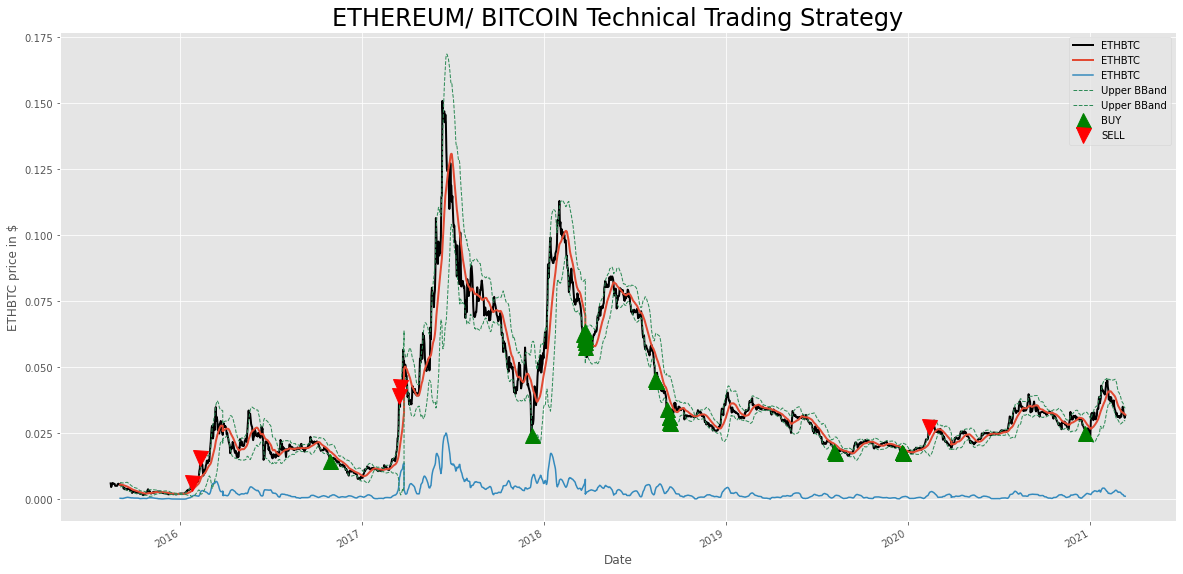

In [50]:
# Plotting the Strategy performance 2020 
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, ylabel='ETHBTC price in $') 
df_c['ETHBTC'].plot(ax=ax1, color='k', lw=2.)
df_c['ETHBTC'].rolling(window=20).mean().plot(lw=2)
df_c['ETHBTC'].rolling(window=20).std().plot()
(df_c['ETHBTC'].rolling(window=20).mean() + (df_c['ETHBTC'].rolling(window=20).std() * 2)).plot(label = 'Upper BBand', color = 'seagreen', 
                                                                                                linestyle = 'dashed', alpha =1, lw=1)
(df_c['ETHBTC'].rolling(window=20).mean() - (df_c['ETHBTC'].rolling(window=20).std() * 2)).plot(label = 'Upper BBand', color = 'seagreen', 
                                                                                                linestyle = 'dashed', alpha =1, lw=1)

ax1.plot(df_c.loc[df_c['Strategy'] == 'BUY'].index, df_c.ETHBTC[df_c['Strategy'] == 'BUY'],
         '^', markersize = 15, color = 'green', label='BUY')

ax1.plot(df_c.loc[df_c['Strategy'] == 'SELL'].index, df_c.ETHBTC[df_c['Strategy'] == 'SELL'],
         'v', markersize = 15, color = 'red', label='SELL')

plt.title('ETHEREUM/ BITCOIN Technical Trading Strategy', fontsize= 24)
plt.legend()
plt.show()

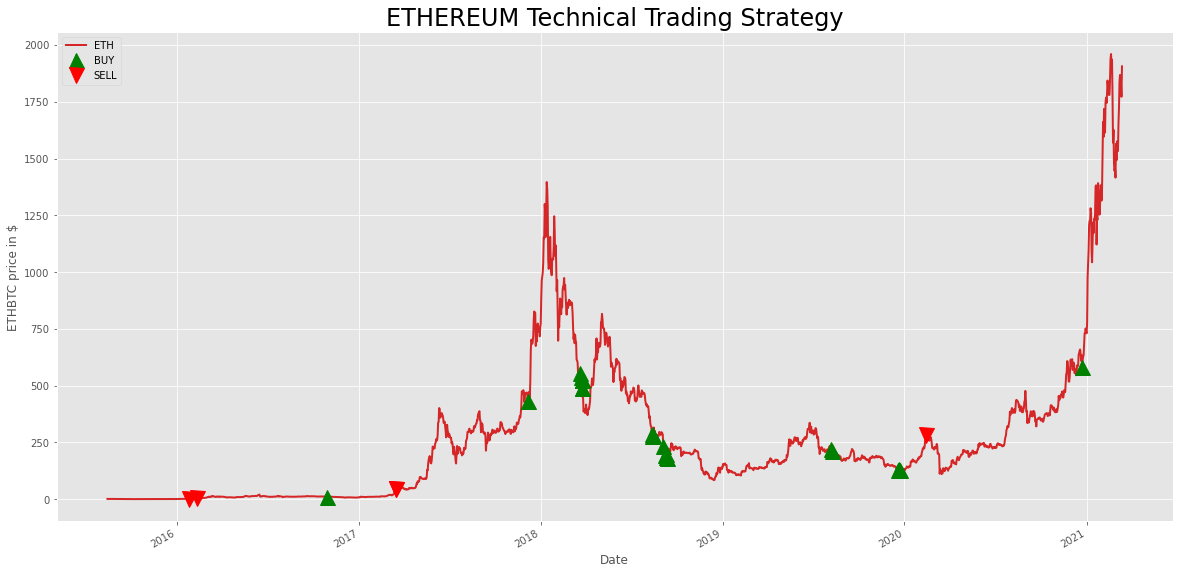

In [51]:
# Plotting the Strategy performance 2020 
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, ylabel='ETHBTC price in $') 
df_c['ETH'].plot(ax=ax1, color='tab:red', lw=2.)

ax1.plot(df_c.loc[df_c['Strategy'] == 'BUY'].index, df_c.ETH[df_c['Strategy'] == 'BUY'],
         '^', markersize = 15, color = 'green', label='BUY')

ax1.plot(df_c.loc[df_c['Strategy'] == 'SELL'].index, df_c.ETH[df_c['Strategy'] == 'SELL'],
         'v', markersize = 15, color = 'red', label='SELL')

plt.title('ETHEREUM Technical Trading Strategy', fontsize= 24)
plt.legend()
plt.show()